In [46]:
import pandas as pd
from neo4j  import GraphDatabase, basic_auth
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
driver = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j", "Welcome1"))

In [48]:
Query = '''CALL algo.betweenness.stream('','',{direction:'both'})
YIELD nodeId, centrality
MATCH (person:Person) WHERE id(person) = nodeId
RETURN person.name, centrality
ORDER BY centrality DESC LIMIT 10'''

session = driver.session()
res = session.run(Query)
    
col = ['name', 'centrality']
df = pd.DataFrame([r.values() for r in res], columns=col)
    
session.close()

del session

([<matplotlib.axis.XTick at 0x7fe6e6e62208>,
 <a list of 10 Text xticklabel objects>)

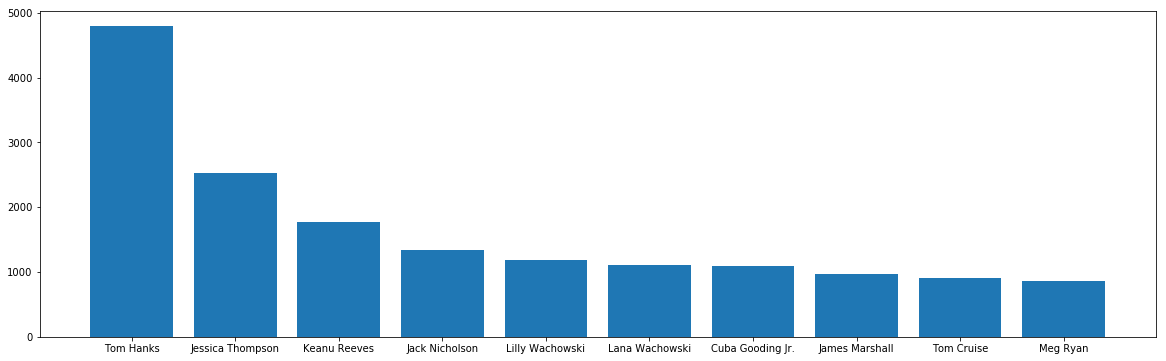

In [49]:
plt.figure(figsize=(20, 6))
plt.bar(list(range(len(df))), df['centrality'])
plt.xticks(list(range(len(df))), df['name'])